In [1]:
from data import Data

import matplotlib.pyplot as plt
import pandas as pd
import os
from tools import *

In [2]:
filename = 'apple_health_export/export.xml'

data = Data(filename)

In [3]:
df = data.get_workout_dataframe()

In [4]:
data.get_usage()

{'first_use': datetime.date(2021, 5, 13),
 'dates_used': 1239,
 'total_days': 1336,
 'days_workout_tracked': 833,
 'total_hours': 1698.0,
 'total_num_workouts': 1214}

In [5]:
# sum the total calories burned
total_calories = df['activeCalories'].sum()
print(f'Total Calories Burned: {total_calories}')

Total Calories Burned: 726583.1971799999


In [6]:
# retrict to 2024
df = df[df['startDate'].dt.year == 2024]

In [7]:
# total number of workouts
total_workouts = len(df)
print(f'Total Workouts in 2024: {total_workouts}')

Total Workouts in 2024: 360


In [8]:
# remove prefix from workout type HKWorkoutActivityType
df['workoutActivityType'] = df['workoutActivityType'].str.replace('HKWorkoutActivityType', '')

In [9]:
# change TraditionalStrengthTraining to StrengthTraining
df['workoutActivityType'] = df['workoutActivityType'].replace('TraditionalStrengthTraining', 'StrengthTraining')

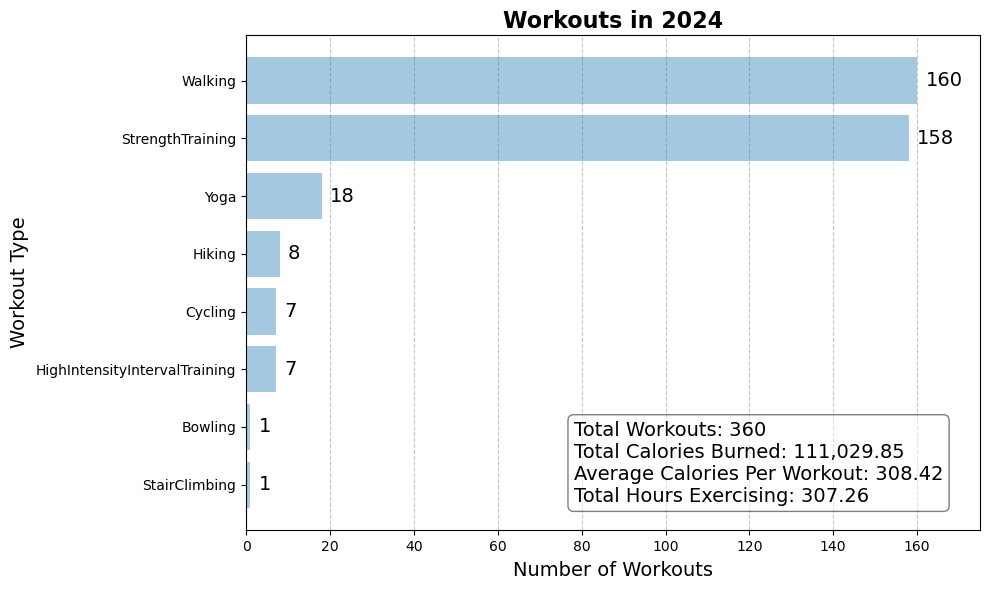

In [12]:
# Prepare data
workout_counts = df["workoutActivityType"].value_counts()
workout_types = workout_counts.index
counts = workout_counts.values

# # 2023 data
# workout_counts23 = df_2023["workoutActivityType"].value_counts()
# workout_types23 = workout_counts23.index
# counts23 = workout_counts23.values

# # 2022 data
# workout_counts22 = df_2022["workoutActivityType"].value_counts()
# workout_types22 = workout_counts22.index
# counts22 = workout_counts22.values

# Plotting
plt.figure(figsize=(10, 6))  # Adjusted size for horizontal bars
bars = plt.barh(workout_types[::-1], counts[::-1], color='C0', zorder=2, alpha=0.4)  # Use barh for horizontal bars
# # add 2023 
# bars23 = plt.barh(workout_types23[::-1], counts23[::-1], color='C2', zorder=1, alpha=0.4)
# # add 2022
# bars22 = plt.barh(workout_types22[::-1], counts22[::-1], color='C3', zorder=0, alpha=0.4)

# Annotate bars with their respective counts
for bar in bars:
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height() / 2, 
             f"{int(width)}", va='center', fontsize=14)

# Add gridlines for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Titles and labels
plt.title("Workouts in 2024", fontsize=16, fontweight='bold', pad=5)
plt.xlabel("Number of Workouts", fontsize=14, labelpad=5)
plt.ylabel("Workout Type", fontsize=14, labelpad=5)

# Summary information
total_workouts = len(df)
total_calories = df['activeCalories'].sum()
summary_text = (
    f"Total Workouts: {total_workouts}\n"
    f"Total Calories Burned: {total_calories:,.2f}\n"
    f"Average Calories Per Workout: {total_calories / total_workouts:.2f}\n"
    f"Total Hours Exercising: {df['duration'].sum() / 60:.2f}"
)

# Add a text box with summary stats
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.95, 0.05, summary_text, transform=plt.gca().transAxes, fontsize=14,
         verticalalignment='bottom', horizontalalignment='right', bbox=props, multialignment='left')
plt.xlim(0,175)
# Adjust layout for clarity
plt.tight_layout()
# plt.savefig("plots/2024/workouts.pdf")
plt.show()

In [ ]:
# get 2023 data to compare
df_2022 = data.get_workout_dataframe()
# retrict to 2023
df_2022 = df_2022[df_2022['startDate'].dt.year == 2022]
# remove prefix from workout type HKWorkoutActivityType
df_2022['workoutActivityType'] = df_2022['workoutActivityType'].str.replace('HKWorkoutActivityType', '')
# change TraditionalStrengthTraining to StrengthTraining
df_2022['workoutActivityType'] = df_2022['workoutActivityType'].replace('TraditionalStrengthTraining', 'StrengthTraining')

df_2023 = data.get_workout_dataframe()
# retrict to 2023
df_2023 = df_2023[df_2023['startDate'].dt.year == 2023]
# remove prefix from workout type HKWorkoutActivityType
df_2023['workoutActivityType'] = df_2023['workoutActivityType'].str.replace('HKWorkoutActivityType', '')
# change TraditionalStrengthTraining to StrengthTraining
df_2023['workoutActivityType'] = df_2023['workoutActivityType'].replace('TraditionalStrengthTraining', 'StrengthTraining')

In [93]:
df_2022 = df_2022[df_2022['workoutActivityType'].isin(df['workoutActivityType'].unique())]

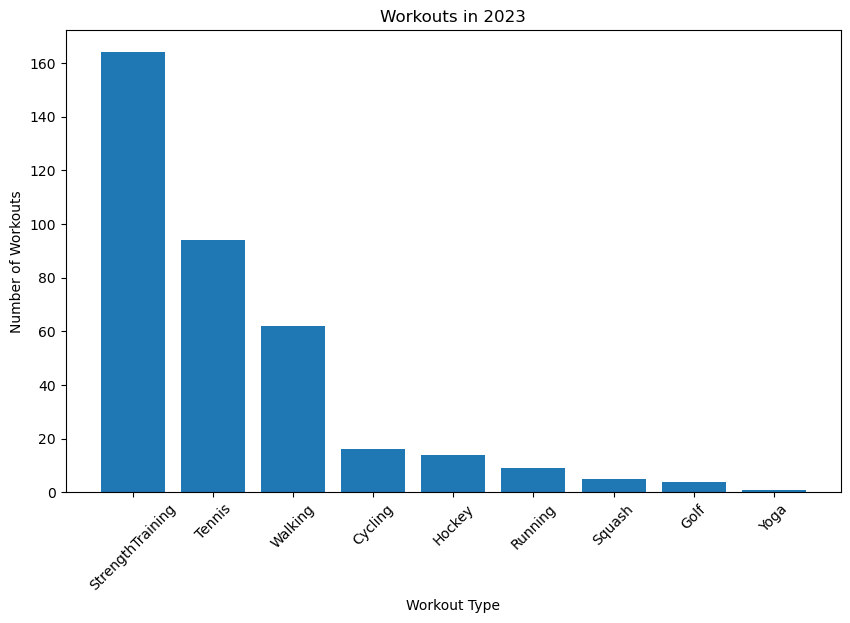

In [ ]:
# get 2023 data to compare
# df_2023 = data.get_workout_dataframe()
# # retrict to 2023
# df_2023 = df_2023[df_2023['startDate'].dt.year == 2023]
# # remove prefix from workout type HKWorkoutActivityType
# df_2023['workoutActivityType'] = df_2023['workoutActivityType'].str.replace('HKWorkoutActivityType', '')
# # change TraditionalStrengthTraining to StrengthTraining
# df_2023['workoutActivityType'] = df_2023['workoutActivityType'].replace('TraditionalStrengthTraining', 'StrengthTraining')
# make a bar chart for the number of each workout
plt.figure(figsize=(10, 6))
plt.bar(df_2023["workoutActivityType"].value_counts().keys().to_list()df_2023["workoutActivityType"].value_counts())
plt.title("Workouts in 2023")
plt.xlabel("Workout Type")
plt.ylabel("Number of Workouts")
# rotate the x-axis labels
plt.xticks(rotation=45)
plt.show()

In [62]:
# remove exercises that are not in the 2024 df
df_2023 = df_2023[df_2023['workoutActivityType'].isin(df['workoutActivityType'].unique())]

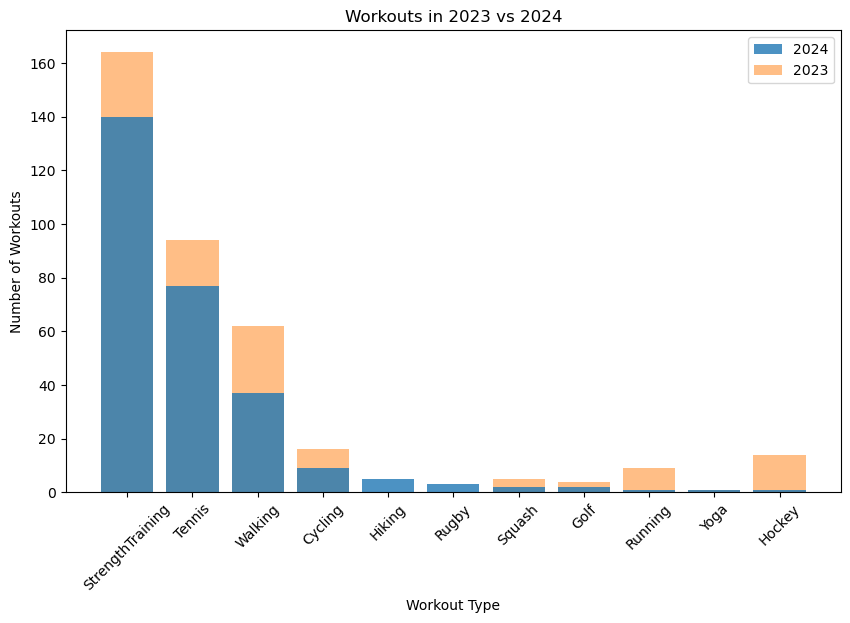

In [ ]:
# add 2023 to the bar chart for 2024
plt.figure(figsize=(10, 6))

plt.bar(df["workoutActivityType"].value_counts().keys().to_list()df["workoutActivityType"].value_counts(), label='2024',alpha=0.8, zorder=1)
plt.bar(df_2023["workoutActivityType"].value_counts().keys().to_list()df_2023["workoutActivityType"].value_counts(), label='2023', alpha=0.5, zorder=0)
plt.title("Workouts in 2023 vs 2024")
plt.xlabel("Workout Type")
plt.ylabel("Number of Workouts")
# rotate the x-axis labels
plt.xticks(rotation=45)
# add legend
plt.legend()
plt.show()

In [67]:
# total calories from 2023 
total_calories_2023 = df_2023['activeCalories'].sum()

# print both 
print(f'Total Calories Burned in 2023: {total_calories_2023}')
# total calories from 2024
print(f'Total Calories Burned in 2024: {total_calories}')
# print difference
print(f'Difference in Calories Burned: {total_calories_2023 - total_calories}')

Total Calories Burned in 2023: 226436.9814
Total Calories Burned in 2024: 167831.41167
Difference in Calories Burned: 58605.56972999999


In [73]:
len(df_2023)-len(df)

91

# year over year comparisons

In [16]:
df22 = df.query('creationDate.dt.year == 2022')
df23 = df.query('creationDate.dt.year == 2023')
df24 = df.query('creationDate.dt.year == 2024')

In [17]:
# fix the workout names
df22['workoutActivityType'] = df22['workoutActivityType'].str.replace('HKWorkoutActivityType', '')
df23['workoutActivityType'] = df23['workoutActivityType'].str.replace('HKWorkoutActivityType', '')
df24['workoutActivityType'] = df24['workoutActivityType'].str.replace('HKWorkoutActivityType', '')

/var/folders/71/rd8s6g0x52sd1l6wnf9_z6_r0000gn/T/ipykernel_6657/1390601372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['workoutActivityType'] = df22['workoutActivityType'].str.replace('HKWorkoutActivityType', '')
/var/folders/71/rd8s6g0x52sd1l6wnf9_z6_r0000gn/T/ipykernel_6657/1390601372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df23['workoutActivityType'] = df23['workoutActivityType'].str.replace('HKWorkoutActivityType', '')
/var/folders/71/rd8s6g0x52sd1l6wnf9_z6_r0000gn/T/ipykernel_6

In [24]:
df22['workoutActivityType'] = df22['workoutActivityType'].str.replace('TraditionalStrengthTraining', 'Gym')
df23['workoutActivityType'] = df23['workoutActivityType'].str.replace('TraditionalStrengthTraining', 'Gym')
df24['workoutActivityType'] = df24['workoutActivityType'].str.replace('TraditionalStrengthTraining', 'Gym')

df22['workoutActivityType'] = df22['workoutActivityType'].str.replace('FunctionalStrengthTraining', 'Functional')
df23['workoutActivityType'] = df23['workoutActivityType'].str.replace('FunctionalStrengthTraining', 'Functional')
df24['workoutActivityType'] = df24['workoutActivityType'].str.replace('FunctionalStrengthTraining', 'Functional')

/var/folders/71/rd8s6g0x52sd1l6wnf9_z6_r0000gn/T/ipykernel_6657/1913093740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['workoutActivityType'] = df22['workoutActivityType'].str.replace('TraditionalStrengthTraining', 'Gym')
/var/folders/71/rd8s6g0x52sd1l6wnf9_z6_r0000gn/T/ipykernel_6657/1913093740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df23['workoutActivityType'] = df23['workoutActivityType'].str.replace('TraditionalStrengthTraining', 'Gym')
/var/folders/71/rd8s6g0x52sd1l6wnf9_z6_r00

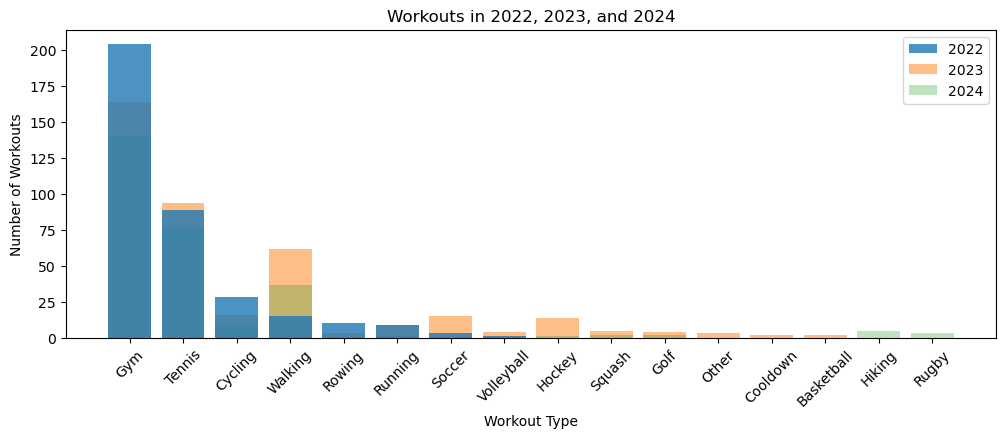

In [ ]:
# create bar chart compation the years 

plt.figure(figsize=(12, 4))
plt.bar(df22["workoutActivityType"].value_counts().keys().to_list()df22["workoutActivityType"].value_counts(), label='2022',alpha=0.8, zorder=1)
plt.bar(df23["workoutActivityType"].value_counts().keys().to_list()df23["workoutActivityType"].value_counts(), label='2023', alpha=0.5, zorder=0)
plt.bar(df24["workoutActivityType"].value_counts().keys().to_list()df24["workoutActivityType"].value_counts(), label='2024', alpha=0.3, zorder=0)

plt.title("Workouts in 2022, 2023, and 2024")
plt.xlabel("Workout Type")
plt.ylabel("Number of Workouts")
# rotate the x-axis labels
plt.xticks(rotation=45)
# add legend
plt.legend()
plt.show()


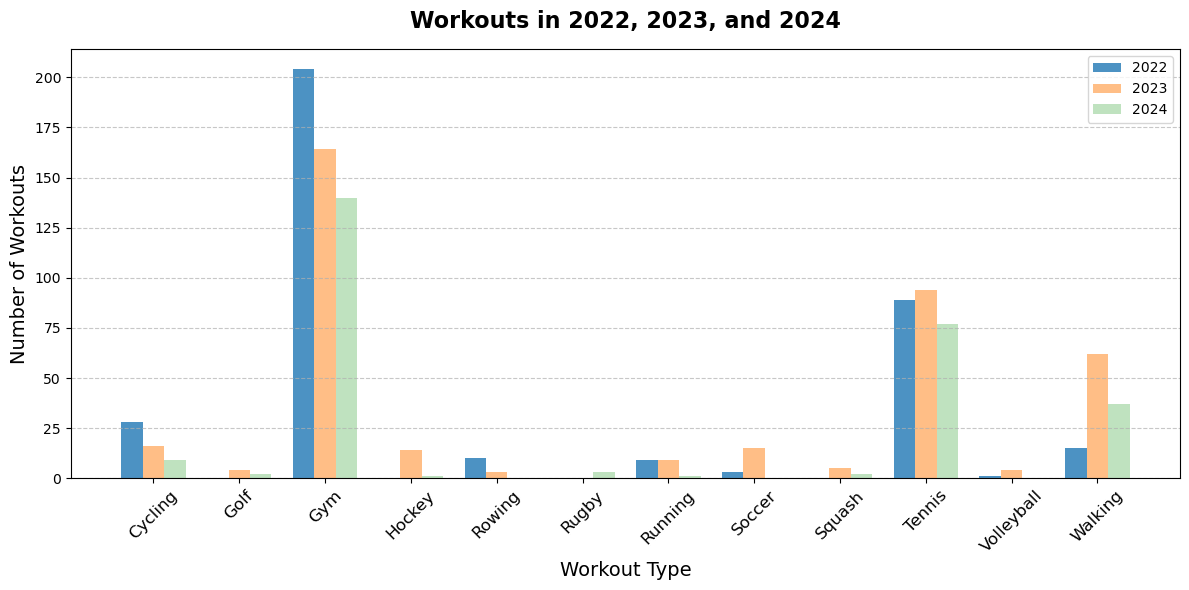

In [35]:
workout_types = list(set(df22["workoutActivityType"].unique()) | 
                     set(df23["workoutActivityType"].unique()) | 
                     set(df24["workoutActivityType"].unique()))
workout_types.sort()  # Ensure consistent order

counts_2022 = df22["workoutActivityType"].value_counts().reindex(workout_types, fill_value=0)
counts_2023 = df23["workoutActivityType"].value_counts().reindex(workout_types, fill_value=0)
counts_2024 = df24["workoutActivityType"].value_counts().reindex(workout_types, fill_value=0)

# Bar positions
x = np.arange(len(workout_types))
width = 0.25  # Width of each bar

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x - width, counts_2022, width=width, label='2022', alpha=0.8, zorder=1)
plt.bar(x, counts_2023, width=width, label='2023', alpha=0.5, zorder=0)
plt.bar(x + width, counts_2024, width=width, label='2024', alpha=0.3, zorder=0)

# Labels and titles
plt.title("Workouts in 2022, 2023, and 2024", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Workout Type", fontsize=14)
plt.ylabel("Number of Workouts", fontsize=14)
plt.xticks(x, workout_types, rotation=45, fontsize=12)

# Add legend
plt.legend()

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()
plt.show()

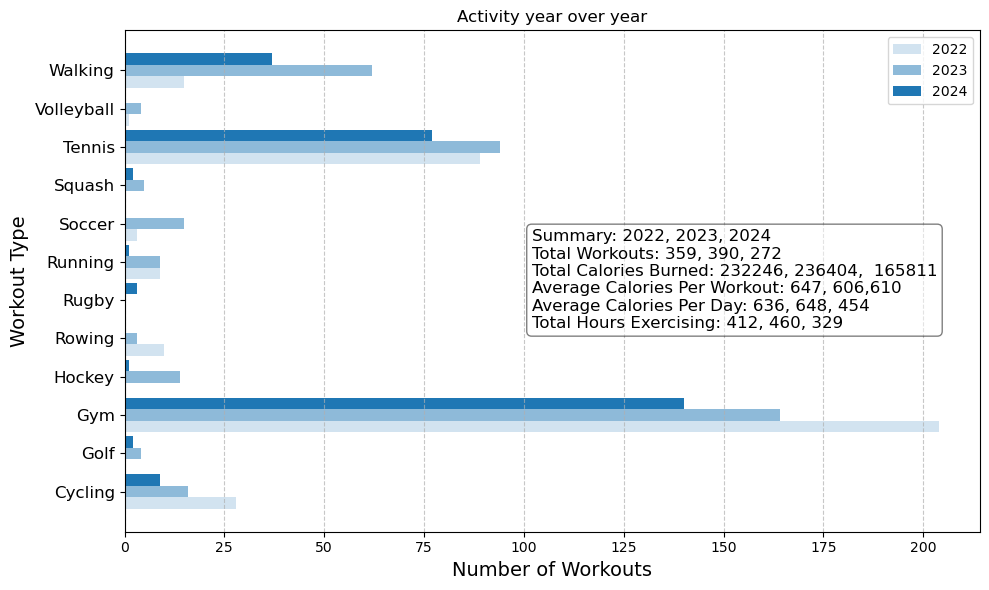

In [64]:
# Prepare data
workout_types = list(set(df22["workoutActivityType"].unique()) | 
                     set(df23["workoutActivityType"].unique()) | 
                     set(df24["workoutActivityType"].unique()))
workout_types.sort()  # Ensure consistent order

counts_2022 = df22["workoutActivityType"].value_counts().reindex(workout_types, fill_value=0)
counts_2023 = df23["workoutActivityType"].value_counts().reindex(workout_types, fill_value=0)
counts_2024 = df24["workoutActivityType"].value_counts().reindex(workout_types, fill_value=0)

# Bar positions
y = np.arange(len(workout_types))
width = 0.3  # Width of each bar

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(y - width, counts_2022, height=width, label='2022', color='tab:blue', alpha=0.2, zorder=1)
plt.barh(y, counts_2023, height=width, label='2023', alpha=0.5,color='tab:blue', zorder=0)
plt.barh(y + width, counts_2024, height=width, label='2024', color='tab:blue',alpha=1, zorder=0)

# Labels and titles
plt.title("Activity year over year")
plt.ylabel("Workout Type", fontsize=14)
plt.xlabel("Number of Workouts", fontsize=14)
plt.yticks(y, workout_types, fontsize=12)

# Add legend
plt.legend()

# Summary information
total_workouts22 = len(df22)
total_calories22 = round(df22['activeCalories'].sum())
avgCalPerDay22 = round(total_calories22 / 365)
total_workouts23 = len(df23)
total_calories23 = round(df23['activeCalories'].sum())
avgCalPerDay23 = round(total_calories23 / 365)
total_workouts24 = len(df24)
total_calories24 = round(df24['activeCalories'].sum())
avgCalPerDay24 = round(total_calories24 / 365)
summary_text = (
    f"Summary: 2022, 2023, 2024\n"
    f"Total Workouts: {total_workouts22}, {total_workouts23}, {total_workouts24}\n"
    f"Total Calories Burned: {total_calories22}, {total_calories23},  {total_calories24}\n"
    f"Average Calories Per Workout: {round(total_calories22 / total_workouts22)}, {round(total_calories23 / total_workouts23)},{round(total_calories24 / total_workouts24)} \n"
    f"Average Calories Per Day: {avgCalPerDay22}, {avgCalPerDay23}, {avgCalPerDay24}\n"
    f"Total Hours Exercising: {round(df22['duration'].sum() / 60)}, {round(df23['duration'].sum() / 60)}, {round(df24['duration'].sum() / 60)}"
)

# Add a text box with summary stats
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.95, 0.4, summary_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment='right', bbox=props, multialignment='left')

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()
plt.savefig("plots/2024/year-over-year.pdf")
plt.show()

In [34]:
# remove CardioDance workout types from all dfs 
df22 = df22[df22['workoutActivityType'] != 'CardioDance']
df23 = df23[df23['workoutActivityType'] != 'CardioDance']
df24 = df24[df24['workoutActivityType'] != 'CardioDance']

# remove Yoga, Functional, SkatingSports, Cooldown
df22 = df22[df22['workoutActivityType'] != 'Yoga']
df23 = df23[df23['workoutActivityType'] != 'Yoga']
df24 = df24[df24['workoutActivityType'] != 'Yoga']

df22 = df22[df22['workoutActivityType'] != 'Functional']
df23 = df23[df23['workoutActivityType'] != 'Functional']
df24 = df24[df24['workoutActivityType'] != 'Functional']

df22 = df22[df22['workoutActivityType'] != 'SkatingSports']
df23 = df23[df23['workoutActivityType'] != 'SkatingSports']
df24 = df24[df24['workoutActivityType'] != 'SkatingSports']

df22 = df22[df22['workoutActivityType'] != 'AmericanFootball']
df23 = df23[df23['workoutActivityType'] != 'AmericanFootball']
df24 = df24[df24['workoutActivityType'] != 'AmericanFootball']

df22 = df22[df22['workoutActivityType'] != 'Cooldown']
df23 = df23[df23['workoutActivityType'] != 'Cooldown']
df24 = df24[df24['workoutActivityType'] != 'Cooldown']

df22 = df22[df22['workoutActivityType'] != 'Other']
df23 = df23[df23['workoutActivityType'] != 'Other']
df24 = df24[df24['workoutActivityType'] != 'Other']


df22 = df22[df22['workoutActivityType'] != 'Basketball']
df23 = df23[df23['workoutActivityType'] != 'Basketball']
df24 = df24[df24['workoutActivityType'] != 'Basketball']


df22 = df22[df22['workoutActivityType'] != 'Hiking']
df23 = df23[df23['workoutActivityType'] != 'Hiking']
df24 = df24[df24['workoutActivityType'] != 'Hiking']

In [32]:
# total active calories for all three years 

print(f'Total Active Calories in 2022: {df22["activeCalories"].sum()}')
print(f'Total Active Calories in 2023: {df23["activeCalories"].sum()}')
print(f'Total Active Calories in 2024: {df24["activeCalories"].sum()}')

Total Active Calories in 2022: 232245.67859999998
Total Active Calories in 2023: 238040.12430000002
Total Active Calories in 2024: 167607.53267000002
